# King County Housing Prices and Business Recommendations
## A model based project

![title](img/seattle.jpg)

# Introduction
### Business Questions

#### The stakeholders 
2 years ago, when I was still in college my dad called me on the phone saying he needed my help. I had been living in Seattle for a little bit over 2 years and was already living in my own appartment. I studied at the University of Washington and lived in what is called the U-District, 5 minutes away from Downtown Seattle using public transportation. My dad said he was looking to buy some house or appartment in the seattle area, preferably in the u-district area. His plan was to buy, remodel and rent the property via Airbnb or a similar app. This short term money he would be receiving notwithstanding, at the end of the day he wanted a long term investment that he could sell decades in the future. At the time I had no idea who to call or where to look for information, so the plan stalled. 

This project is a "what-if" that looks to analyze housing data from the King County, which includes houses in places like downtown Seattle, the modern and expensive Belleveue and of course the U-District to experiment one way I could have contrubuited to the investment. The project's ultimate goal is to answer the following question posed by my dad: once the house has been bought, what are the features that will maximize house pricing. In other words, where should I spend the remodeling budget specifically.



#### Business problem 
The business problem is trying to maximize the "flip" of the property by investing the available money in the best features. Will having an additional chimney give my dad more bang for the buck or will adding another bathroom be the most efficient?


#### Project scope
The problem's scope then is to found how much each prediction variable influences de price of the house and then make a suggestion about that specific feature, ultimately calling my dad and telling him something like: "dad, add another bathroom instead of another bedroom, that will make the property more valuable."

It is important to understand that the location is irrelevant because that doesn't have any *improvement* potential. That is, our regression model doesn't make sense when having the predictor variable as a latittude and longitude, so the house location will not be something about which we'll make a suggestion and therefore is outside the scope of the project. However, specific features related to location might be something worth looking out for, because at the end of the day, if there seems to be some feature that is related house price, it has business recomendation potential.  



#### What is the expected timeline for this project?
The housing in Seattle is very competitive and house prices are constantly going up as the city aggresively expands. According to Norada Real Estate "Seattle House Prices rose faster in October 2019 than they have for a year.In October, [...] house prices rose 3.3% from a year ago, to $775,000 — the largest percentage increase in 12 months."

With this in mind, there would be a strong motivation to finish the project before the end of the month. It is also important to point out that the data is not in real time, so even if we were to report our concluissions and business sugestions, we would alrady be late in theory. Still, the project should be complete in a month due to how fast the market grows. There's no time to lose!

## About the data



#### What is our target?
The target data is price. Because of the business problem we want to be able to calculate price based on all of the other features.

### Predictor variables
#### The following variables will be used to build the model:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

#### Predictor Datatypes
There is a lot of information from where to build, but the majority of the data is numeric. Some of the variables are clearly categorical, which will be handled appropriately. A lot of the variables already look unecessary or irrelevant for the task in hand so a good first step could be to handle these worthless columns.


#### How big is the dataset?
The dataset contains information of more than 21 thousand homes in the Seattle area. This seems to be a good number of data and more than enough to split into training and test data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline  

In [2]:
housing = pd.read_csv('data/kc_house_data.csv')

Due to the sheer number of features the dataset contains, I’ll begin by taking off some columns that right off the bat seem unnecessary and will allow us to focus on the most useful columns.

In [3]:
drop_set = ['date', 'view','sqft_above','sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']
housing = housing.drop(drop_set, axis=1)

I'll use the head function to take a look at the data and get a sense of what we're dealing here:

In [4]:
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045


Now lets take a look at more technical information about the data:

In [5]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676,47.560093,-122.213982
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234,0.138552,0.140724
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,47.155900,-122.519000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,47.471100,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,47.571800,-122.231000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,47.777600,-121.315000


The describe method allows us to get a feel of the values that we’re dealing here. Maximums, minimums, and quartiles are all numbers that will be helpful in a bit.

Let’s have some fun with the data. We have information of the year the houses were built as well as their location in coordinates. If we use a simple scatter plot and color the instances depending on the year they were built we get a fun look at how the city has grown from downtown Seattle. 

Below is a picture of King County for reference.

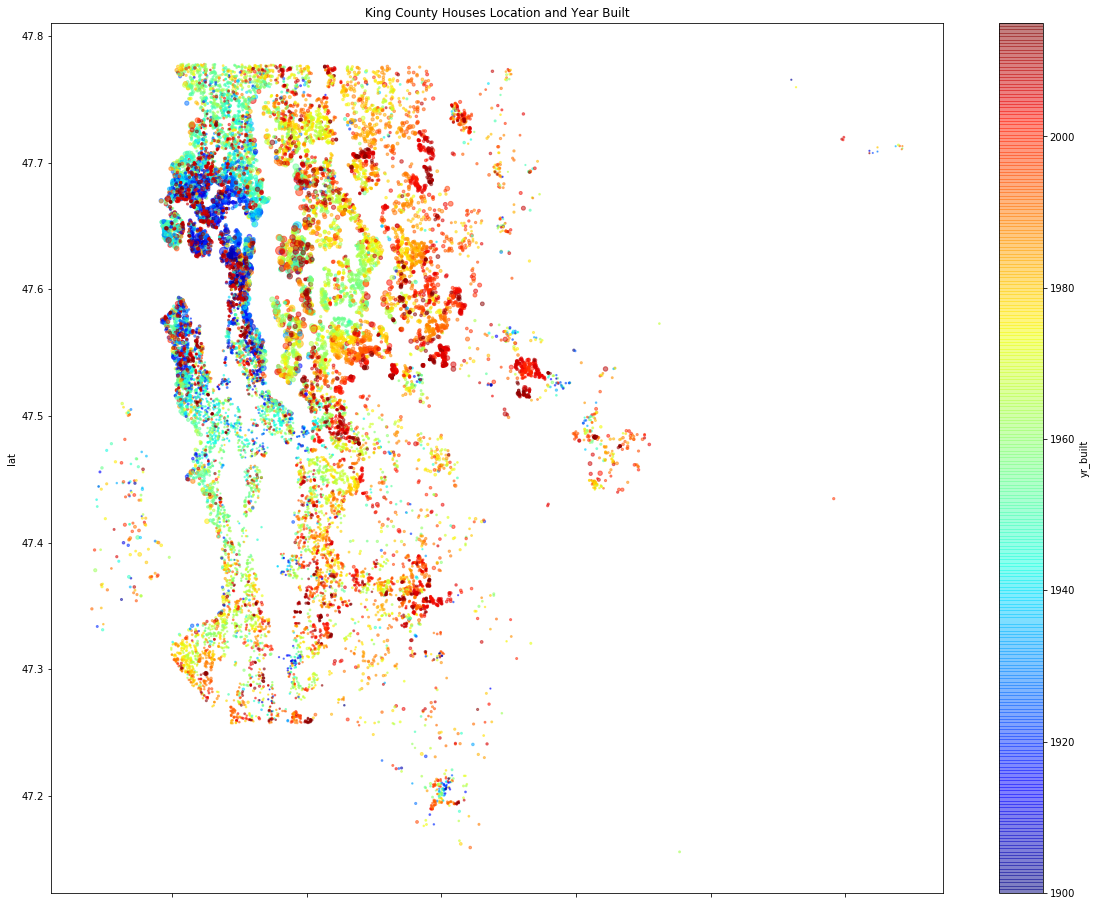

In [6]:
housing.plot(kind='scatter', x='long', y= 'lat', alpha=0.5, figsize=(20,16),
            s=housing['price']/100000, c='yr_built', cmap=plt.get_cmap('jet'), colorbar=True)
plt.title('King County Houses Location and Year Built')
plt.show()

![title](img/KingCounty.png)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
id             21597 non-null int64
price          21597 non-null float64
bedrooms       21597 non-null int64
bathrooms      21597 non-null float64
sqft_living    21597 non-null int64
sqft_lot       21597 non-null int64
floors         21597 non-null float64
waterfront     19221 non-null float64
condition      21597 non-null int64
grade          21597 non-null int64
yr_built       21597 non-null int64
lat            21597 non-null float64
long           21597 non-null float64
dtypes: float64(6), int64(7)
memory usage: 2.1 MB


Let’s start taking a look at the variables counts and datatypes. We can divide these variables into numerical attributes and categorical attributes. Even if some predictors seem numerical(the number of bathrooms for example is a quantitative variable) some of these variables are discrete variables that we could think of in terms of categorical inputs.

- **Numeric Variables:**
    - Id
    - price
    - sqft_living
    - sqft_lot
    - yr_built
    - Lat
    - long
- **Categorical Variables:**
    - bedrooms
    - bathrooms
    - floors
    - condition
    - grade


Let's take a look at panda's scatter matrix, which plots all of the variables against each other. First, I'll focus on the numerical attributes:

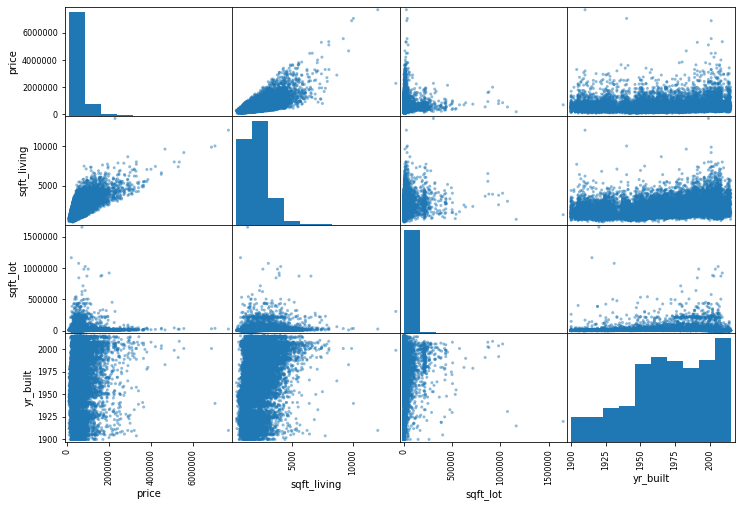

In [8]:
from pandas.plotting import scatter_matrix

numerical = ['price', 'sqft_living' , 'sqft_lot' , 'yr_built']
scatter_matrix(housing[numerical], figsize=(12,8))
plt.show()

**Capped Data, Missing Values and Multicollinearity**

The first thing I’m looking for in these scatter plots is to find any signs that the variables have been capped. That is, look at the maximum of some attribute and check if there seems to be more values than usual. A simple visual check confirms that none of these continuous variables show this cap. 

Also, im starting to look for multicollinearity in the predictor variables, which is never good for a regression model. Fortunately, this variables don't seem to be too related to each other.

Let's take a look at seaborn's heatmap to further look for multicolinearity:

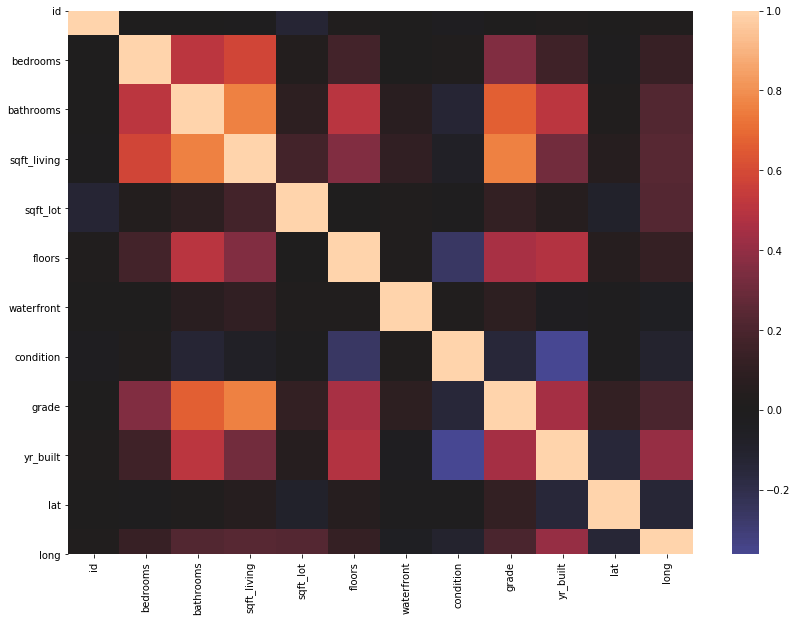

In [9]:
import seaborn as sns;
X = housing.drop(columns=['price'], axis=1)
plt.figure(figsize=(14, 10))
sns.heatmap(X.corr(), center=0)
plt.show()

Apparently there seems to be some correlation between the sqft_above and the sqft_living variables. This is something to keep in mind before fitting our models. It might be a good idea to drop one of these columns.

Next, I’ll look for minimums because it seems none of these variables have missing values. This can mean it’s our lucky day, but it might also mean that any missing value has been unfortunately listed as a zero or another extreme number:

In [10]:
housing[numerical].describe()

,price,sqft_living,sqft_lot,yr_built
count,2.159700e+04,21597.000000,2.159700e+04,21597.000000
mean,5.402966e+05,2080.321850,1.509941e+04,1970.999676
std,3.673681e+05,918.106125,4.141264e+04,29.375234
min,7.800000e+04,370.000000,5.200000e+02,1900.000000
25%,3.220000e+05,1430.000000,5.040000e+03,1951.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1975.000000
75%,6.450000e+05,2550.000000,1.068500e+04,1997.000000
max,7.700000e+06,13540.000000,1.651359e+06,2015.000000


None of these variables seem to have a suspicious minimum that would indicate a value that has been assigned to missing observations. 

Since we already know our target variable is the house price, it might be a good idea to look at this feature’s distribution more closely.

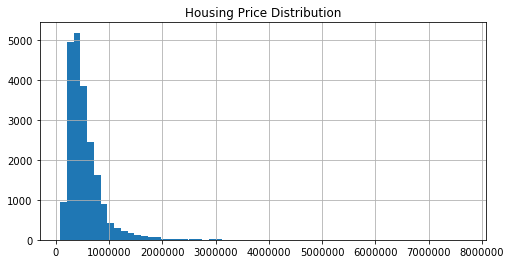

In [11]:
housing['price'].hist(bins=60, figsize=(8,4))
plt.title('Housing Price Distribution')
plt.show()

Our target value looks skewed to the left but otherwise there is nothing to worry about yet.

Let's fill in our missing values from the waterfront column with 0's. We don't want to waste instances just because they dont contain this information, so let's just assume that houses that don't include this information do not have a waterfront. 

In [12]:
housing['waterfront'] = housing['waterfront'].fillna(0)

Let’s move on to the categorical data now:

In [13]:
categorical = ['bedrooms','bathrooms','floors', 'condition', 'grade']
housing[categorical].nunique()

bedrooms     12
bathrooms    29
floors        6
condition     5
grade        11
dtype: int64

If we consider these variables to be categorical, this is the number of unique values each variable could assume. The first problem with this is that there are too many unique values for our bedrooms and bathrooms. Let’s take a closer look at the distribution of these two features in particular.

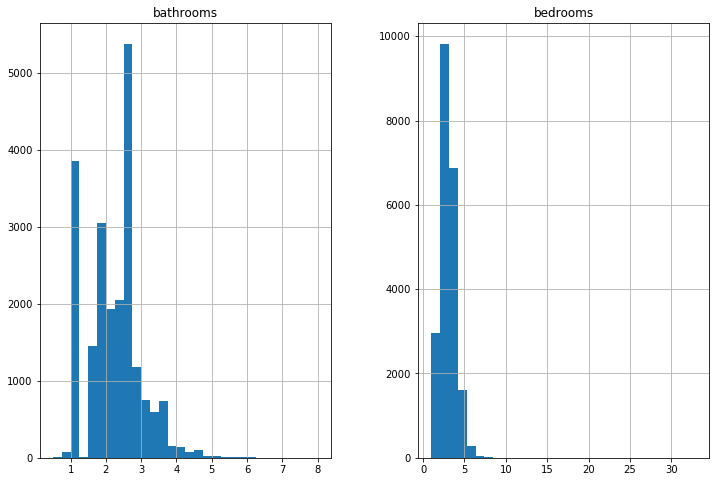

In [14]:
housing.hist(['bedrooms','bathrooms'], bins=30, figsize=(12,8))
plt.show()

It looks like most of the houses have fewer than 5 bathrooms/bedrooms so a good idea might be to reduce all the instances with more than 5 bathrooms/bedrooms to one category.

In [15]:
housing.loc[housing['bathrooms'] > 5, 'bathrooms'] = 5
housing['bathrooms'].describe()

count    21597.000000
mean         2.114090
std          0.760705
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          5.000000
Name: bathrooms, dtype: float64

In [16]:
housing['bathrooms'].nunique()

19


There are still too many unique values associated with the bathroom and that’s because if we look at the data, bathroom values don’t have to be full numbers. Because of this, let’s round any decimal values of bathroom **up** because we’ll consider half bathrooms as an additional bathroom in the house. 

Recall this project focuses on finding the best place to allocate remodeling efforts, so if a house has 1.25 bathrooms for example, we want to make sure that our model represents it as 2 bathroom “units” .

In [17]:
import numpy as np
housing['bathrooms'] = housing['bathrooms'].apply(np.ceil) #Rounding up with ceiling function

In [18]:
housing['bathrooms'].nunique()

5

One important problem with reducing the number of unique values by rounding up is that there is a loss of information with houses that have more than one “quarter” bathroom. It is impossible to differentiate between half bathrooms and two 0.25 bathrooms, so we’ll just have to acknowledge this loss. 


Let's do the same to the bedrooms:


In [19]:
housing.loc[housing['bedrooms'] > 5, 'bedrooms'] = 5
housing['bedrooms'].nunique()

5

Finally, let's use a one hot encoder to represent this categorical variable:

In [20]:
dummy_bedroom = pd.get_dummies(housing['bedrooms'], prefix='bedrooms', drop_first=True)
housing = housing.drop(columns='bedrooms', axis=1)
housing = pd.concat([housing,dummy_bedroom], axis=1)

In [21]:
dummy_bedroom.head()

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


Let's create a function that when given our dataframe, will perform these actions on our categorical variables. 

In [22]:
def categorical(df,categories):
    #categorical = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']
    '''This function takes in a dataframe and an array that contains the names of the
    categorical columns and returns the df with the concatenated dummy variables and 
    the capped values for bathrooms and bedrooms.'''
    housing.loc[housing['bathrooms'] > 5, 'bathrooms'] = 5
    housing.loc[housing['bedrooms'] > 5, 'bedrooms'] = 5
    housing['bathrooms'] = housing['bathrooms'].apply(np.ceil)

    for category in categories:
        dummy = pd.get_dummies(df[category], prefix=category, drop_first=True)
        df = df.drop(columns=category, axis=1)
        df = pd.concat([df,dummy], axis=1)
    return df

Now let’s start building our model pipeline. We want our function to receive the data frame and divide our data into training and test data, then perform all of the necessary pre-processing actions, run the model and then display the model statistics.’

In [23]:
housing = pd.read_csv('data/kc_house_data.csv') #import data again so that we can apply the 
                                                #necessary changes with functions

In [24]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
def pre_processing(df):
    '''The preprocessing function takes in a DataFrame and performs two steps. First it 
    removes the uncessary columns, and fills NaN values with zeros. Then it splits up 
    the data into test and training sets. The function returns 4 sets.'''
    
    drop_set = ['lat','long','id','date', 'view','sqft_above','sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']
    df = df.drop(drop_set, axis=1)
    df['waterfront'] = df['waterfront'].fillna(0)
    
    np.random.seed(42) #Avoid changing the test set everytime the function is called
    indices_shuffled = np.random.permutation(len(df))
    test_set_size = int(0.2*len(df))
    test_indices = indices_shuffled[:test_set_size]
    train_indices = indices_shuffled[test_set_size:]
    train = df.iloc[train_indices]
    test = df.iloc[test_indices]
    X_train = train.drop(columns='price', axis=1)
    Y_train = train.price
    X_test = test.drop(columns='price', axis=1)
    Y_test =test.price
    return X_train, Y_train, X_test, Y_test

In [25]:
def model_creator(X_train, Y_train, X_test, Y_test):
    '''This function creates a linear regression model and runs the score diagnostics related
    to it. It returns a statsmodel Model and displays regression scores. '''
    #Fit the model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,Y_train)
    
    #Obtain Scores
    train_score = lin_reg.score(X_train, Y_train)
    test_score = lin_reg.score(X_test, Y_test)
    
    
    print(train_score, test_score)
    #Stats model 
    
    X_train = sm.add_constant(X_train) #Need to add a constant as specified in the documentation
    smmodel = sm.OLS(Y_train, X_train).fit()
    print(smmodel.summary())
    return smmodel

The idea is to create different versions of models and run the functions in each one of them, let's start with the first one:

In [26]:
def model_1(df): #Always start with preprocess
    X_train, Y_train, X_test, Y_test = pre_processing(df)#keep splits the same
    return model_creator(X_train, Y_train, X_test, Y_test)

This model simply removes the unwanted columns and runs the linear regression model. It is important to note that the model doesn't transform categorical variables.

In [27]:
model1 = model_1(housing)

0.6491021762454562 0.6303937303113716
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3549.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        02:08:17   Log-Likelihood:            -2.3695e+05
No. Observations:               17278   AIC:                         4.739e+05
Df Residuals:                   17268   BIC:                         4.740e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       

/Users/claudioperezrocha/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The r-squared value isn't great, but remember this is the most naive model we've created. The coefficients seem to be in the order of tens of thousands for the bedroom and bathroom variables.

Stil, this model doesn't seem to predict too well, the r2 coefficient is very low, let's see try to find out what is wrong so we have a better idea of what to change. 

In [28]:
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import norm

<Figure size 864x576 with 0 Axes>

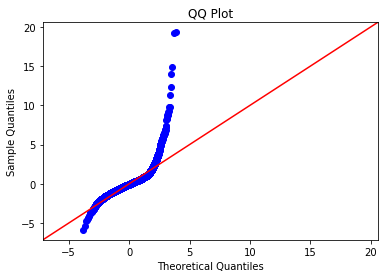

In [29]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

This QQ plot clearly shows that the condition that the model's residuals has to approximate a normal distribution is not met. One possible explanation is that our target variable is heavilty affected by outliers. In linear regression model, it is well known that outliers heavily influence results. Lets try another model but this time, lets try to take care of the outliers first.

The boxplot shown below makes evident just how skewed the target variable is and how many outliers there are.

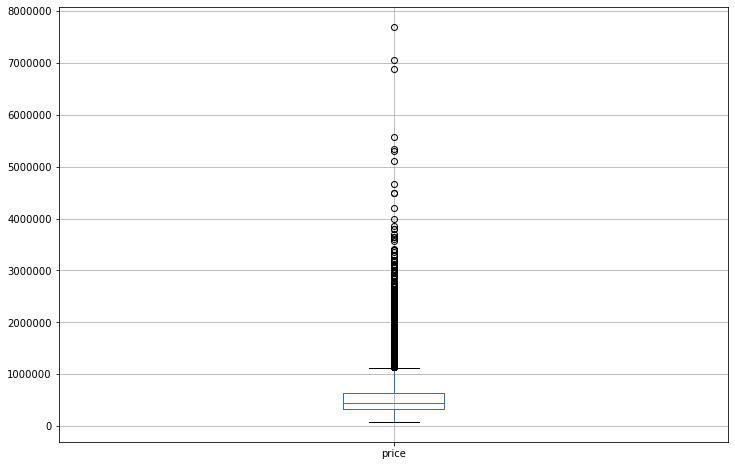

In [30]:
housing.boxplot(column='price', figsize=(12,8))
plt.show()

Let's use the formal definition that an outlier is an instance that is below (Q1 - IQR * 1.5) or above (Q3 + IQR * 1.5):

In [31]:
def IQR(df):
    '''This function takes in a pandas dataframe and calculates the interquartile range 
    and the minimum and maximum values that are used as a treshold for filtering
    outliers from the price target variable. The function returns the filtered dataframe.'''
    #Calculate IQR:
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1

    minim = Q1 - 1.5*IQR
    maxim = Q3 + 1.5*IQR
    df = df[(minim < df['price']) & (df['price'] < maxim)]
    return df
housing_filtered = IQR(housing)

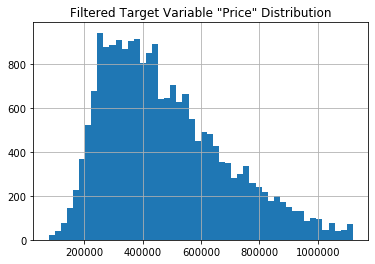

In [32]:
housing_filtered['price'].hist(bins=50)
plt.title('Filtered Target Variable "Price" Distribution')
plt.show()

Still a bit skewed but remember that outliers heavily affect linear regression models, so let's see if that works to help our regression model and the normal distribution condition.

Let's try adding this step into a new model:

In [33]:
def model_2(df):
    '''This second model does exactly the same but as part of the pre processing the target 
    variable has been altered so that any outlier price range is filtered out. The function
    takes in the and returns a sm OLS model that can be used to calculate metrics and
    scores.'''
    df = IQR(df)
    X_train, Y_train, X_test, Y_test = pre_processing(df)#keep splits the same
    return model_creator(X_train, Y_train, X_test, Y_test)

In [34]:
model2 = model_2(housing)

0.5618240793677299 0.5645390715466794
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     2328.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        02:08:18   Log-Likelihood:            -2.1674e+05
No. Observations:               16352   AIC:                         4.335e+05
Df Residuals:                   16342   BIC:                         4.336e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       

/Users/claudioperezrocha/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Weirdly, it looks like the model actually got a lot worse, the r-squared value went down almost by almost 0.10. Let's see if our residual distribution got better though. 

<Figure size 864x576 with 0 Axes>

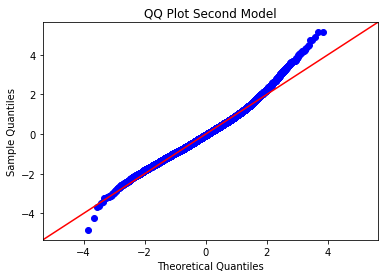

In [35]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot Second Model')
plt.show()

The model performs much worse than the first model but the QQ plot shows that there was an enormous improvement in the residual distribution. 

Now let's implement our categorical function that encodes each predictor value into dummy variables. 

In [36]:
def model_3(df):
    df = IQR(df)
    categories = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']
    df = categorical(df, categories)
    X_train, Y_train, X_test, Y_test = pre_processing(df)#keep splits the same
    return model_creator(X_train, Y_train, X_test, Y_test)

In [37]:
model3 = model_3(housing)

0.5715274815378193 0.5744424190830096
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     381.3
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        02:08:18   Log-Likelihood:            -2.1656e+05
No. Observations:               16352   AIC:                         4.332e+05
Df Residuals:                   16294   BIC:                         4.337e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const 

/Users/claudioperezrocha/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


There's definitely some improvement but this r-squared values are too low still. 

<Figure size 864x576 with 0 Axes>

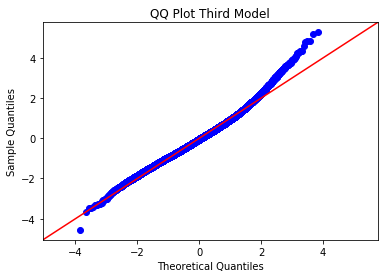

In [38]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot Third Model')
plt.show()

This last model will try to normalize the data with a log function and apply all of the previous transformations as well. 

In [39]:
def model_4(df):
    df.price = np.log(df.price)
    categories = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']
    df = categorical(df, categories)
    
    X_train, Y_train, X_test, Y_test = pre_processing(df)#keep splits the same
    return model_creator(X_train, Y_train, X_test, Y_test)

In [40]:
housing = pd.read_csv('data/kc_house_data.csv') 

In [41]:
model4 = model_4(housing)

0.6525417997015706 0.6334974953407235
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     1045.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        02:08:18   Log-Likelihood:                -4339.1
No. Observations:               17278   AIC:                             8742.
Df Residuals:                   17246   BIC:                             8990.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

/Users/claudioperezrocha/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


This last model seems to be the most promising because it has the highest r-squared while still keeping the normality condition. 

The bad news is that because we have altered the scale of the target value there is not the same intuition on what each coefficient represents for the variables.  A single unit change in some predictor variable doesn’t represent the target variable in their original unit: dollars. So we might still get a sense of the weight each variable has, but not in the unit we’d like.


<Figure size 864x576 with 0 Axes>

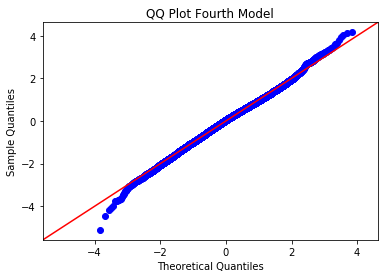

In [42]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot Fourth Model')
plt.show()

In [43]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     1045.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        02:08:19   Log-Likelihood:                -4339.1
No. Observations:               17278   AIC:                             8742.
Df Residuals:                   17246   BIC:                             8990.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.4880      0.394     59.543      0.000      22.715      24.261
sqft_living       0.0002    5.5e-06     37.415      0.000       0.000       0.000
sqft_lot      -5.275e-08   6.07e-08     -0.869      0.385   -1.72e-07    6.62e-08
waterfront        0.5284      0.029     18.113      0.000       0.471       0.586
yr_built         -0.0059      0.000    -49.489      0.000      -0.006      -0.006
bedrooms_2        0.0244      0.026      0.939      0.348      -0.027       0.075
bedrooms_3       -0.0693      0.026     -2.673      0.008      -0.120      -0.018
bedrooms_4       -0.0924      0.026     -3.491      0.000      -0.144      -0.041
bedrooms_5       -0.1126      0.028     -4.052      0.000      -0.167      -0.058
bathrooms_2.0     0.0832      0.008      9.961      0.000       0.067       0.100
bathrooms_3.0     0.1383      0.011     13.131      0.000       0.118       0.159
bathrooms_4.0     0.2481      0.015     16.149      0.000       0.218       0.278
bathrooms_5.0     0.2323      0.028      8.387      0.000       0.178       0.287
floors_1.5        0.0464      0.009      5.053      0.000       0.028       0.064
floors_2.0        0.0401      0.007      5.750      0.000       0.026       0.054
floors_2.5        0.0545      0.028      1.923      0.055      -0.001       0.110
floors_3.0        0.2351      0.016     14.975      0.000       0.204       0.266
floors_3.5        0.1772      0.118      1.502      0.133      -0.054       0.409
condition_2       0.0507      0.077      0.662      0.508      -0.099       0.201
condition_3       0.2101      0.072      2.914      0.004       0.069       0.351
condition_4       0.2235      0.072      3.099      0.002       0.082       0.365
condition_5       0.2952      0.072      4.074      0.000       0.153       0.437
grade_4          -0.2678      0.320     -0.837      0.403      -0.895       0.360
grade_5          -0.0651      0.313     -0.208      0.835      -0.679       0.548
grade_6           0.1330      0.313      0.426      0.670      -0.480       0.746
grade_7           0.4187      0.313      1.340      0.180      -0.194       1.031
grade_8           0.6575      0.313      2.103      0.035       0.045       1.270
grade_9           0.9047      0.313      2.893      0.004       0.292       1.518
grade_10          1.0511      0.313      3.359      0.001       0.438       1.664
grade_11          1.1894      0.313      3.795      0.000       0.575       1.804
grade_12          1.2912      0.315      4.094      0.000       0.673       1.909
grade_13          1.4025      0.328      4.276      0.000       0.760       2.045
==============================================================================
Omnibus:                       78.965   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB

From the data provided by the statsmodel scores, we can observe that the coefficient for the bathroom dummy variables explain a lot of the increase in price according to our model. Our model indicates that the difference between having 2,3 and 4 bathrooms is very big, but then the coefficient for the 5 or more bathrooms dummy variables seems to stay in the vicinity of 4 bathrooms. In other words, the difference in price between a house that has 2 bathrooms and one that has 3 bathrooms is a lot bigger than the difference between a 3 and 4 bathroom homes. 

Another thing that our model suggests is that waterfront homes are -unsurprisingly- more expensive than those that don't have this feature. What our model indicates though is how much more. It seems like it is one of the most important factors that define home price. 

Finally there seems to be a very a statistically significant relationship between the number of floors a house has. More specifically, there's a big difference between 2.5 floors home and 3 floor homes. According to google "A one-and-a-half storey house, or 1.5-storey house is a detached home that has a second floor that is about half the size of the main floor, but is off to one side. This style could also simply be called a 'half storey house'" so this improvement from half storeys to full storeys might be worth taking a look at. 

### Business recomendations:

From the fourth regression model there are 3 business recomendations that I would make to my dad:

- Look for homes that have fewer than 4 bathrooms and focus on adding an extra bathroom during renovation. Adding an extra bathroom to a home with more than 5 doesn't increase home price as much as adding one to a house with less than 5 bathrooms. 

- Look for undervalued waterfront houses. Instead of focusing on remodeling efforts, maybe look for a good deal on a house that has been underaprecated. The data shows that waterfront houses sell significantly for more and regardless of other factors, the most likely thing is that an undervalued house will regress back to the higher price because of the weight the waterfront factor influences home price. 

- Keep an eye out for half storey houses. If renovation makes it possible, converting the "half-storey" home into having an additional full storey will drive the house price considerably.



### Conclusion and  Additional Steps: 

By using a linear regression model, interesting yet actionable results were obtained. However, the model is seriously under-fitting the data and more powerful ML models might be needed for this kind of task. Decision trees or forest models might be powerful enough to capture more of the crucial details of the real estate market, which are crucial for profit opportunities.  

Home prices are driven by lots of factors. As a student living in a college district, it becomes evident that location is a very important factor for rent prices. But when looking for an investment opportunity such as the one my dad was looking to make, it is extremely important to know the market. Minor details might drive home prices up with the chance to make profit with very few risk. This project has taught me that by being smart with your resource allocation, there is a lot of money that can be made and data can be used for that. 